# Fasion MNIST data classification

In [ ]:
!nvidia-smi # this command use for showing the gpu name.

Tue Nov 10 08:03:56 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.3.0
Eager mode:  True
GPU is available


In [ ]:
# load the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pollover', 'Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
type(fashion_mnist)

module

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
# train label and train image
print('Training Label: ')
print(train_labels[0])
print('Training Image: ')
print(train_images[0])

Training Label: 
9
Training Image: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   

In [ ]:
np.min(train_images)

0

In [ ]:
np.max(train_images)

255

### Data preprocessing

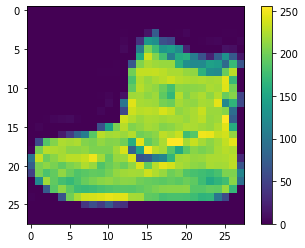

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

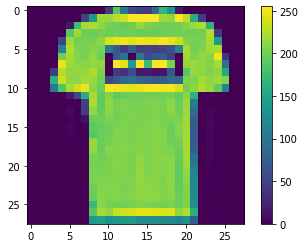

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

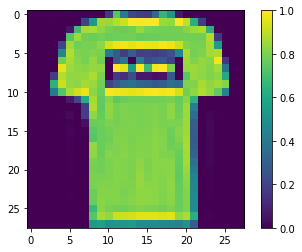

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

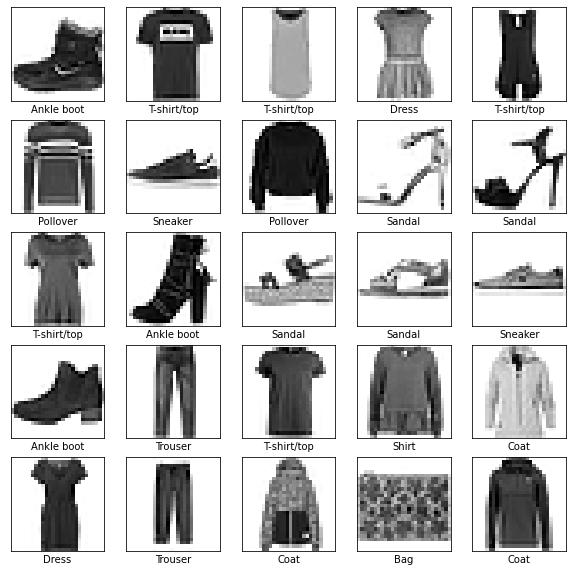

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# modeling

model = keras.Sequential([
   keras.layers.Flatten(input_shape=(28,28)),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(10, activation='softmax')                       
])

In [ ]:
# model compiling

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4978 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3760 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3391 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3118 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2943 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2810 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2684 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2575 - accuracy: 0.9034
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2482 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [ ]:
# model evaluate with test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy: ', test_acc)

313/313 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.8753

Test accuracy:  0.8752999901771545


In [ ]:
# in the scikit learn
from sklearn.metrics import accuracy_score
pred_lebel = model.predict_classes(test_images)
accuracy_score(test_labels, pred_lebel)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.8753

In [ ]:
# prediction
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([1.9596884e-08, 1.2362730e-07, 7.0758366e-10, 1.6873265e-10,
       8.8702103e-07, 1.3204369e-04, 3.6164494e-08, 8.4380270e-04,
       1.6019234e-07, 9.9902296e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

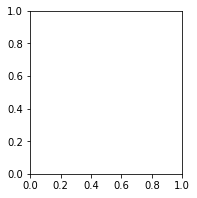

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plt.show()